In [1]:
!pip install -q -r requirements.txt

In [2]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [3]:
data=pd.read_csv('input/data.csv', index_col=0, parse_dates=[0])
print(data.shape)
data.head()

(427, 12)


,total_purchase_amt,total_redeem_amt,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,Interest_6_M,Interest_9_M,Interest_1_Y,mfd_daily_yield,mfd_7daily_yield
date,,,,,,,,,,,,
2013-07-01,0.165344,0.036072,4.456,5.423,6.040,6.8800,5.295,4.2390,4.2820,4.4125,1.5787,6.307
2013-07-02,0.147781,0.016678,3.786,4.750,5.074,5.8000,5.211,4.2344,4.2808,4.4070,1.5461,6.174
2013-07-03,0.138790,0.038872,3.400,4.242,4.658,5.2000,5.148,4.2300,4.2796,4.4022,1.4670,6.034
2013-07-04,0.093242,0.041854,3.348,3.938,4.464,5.1020,5.029,4.2287,4.2776,4.4000,1.4223,5.903
2013-07-05,0.059284,0.018043,3.380,3.816,4.295,4.7885,4.939,4.2273,4.2749,4.4000,1.3845,5.739


In [4]:
train=data.iloc[:-30 ]['total_purchase_amt']
test=data.iloc[-30: ]['total_purchase_amt']
print(train.shape, test.shape)


(397,) (30,)


### train

auto_arima helps select the best meta-parameters.

In [5]:
model = auto_arima(train, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=836.400, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=750.768, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.33 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=838.327, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=625.208, Time=0.42 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.92 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.81 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=630.646, Time=0.25 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=600.376, Time=0.42 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=724.544, Time=0.24 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=3.61 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=2.78 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=596.050, Time=0.77 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=702.480, Time=

### results

In contrast to the results in Notebook 1, the predictions have shown improvement, although they still fall behind expectations. However, when considering the performance on the test data, it becomes evident that the model may not be suitable for production use


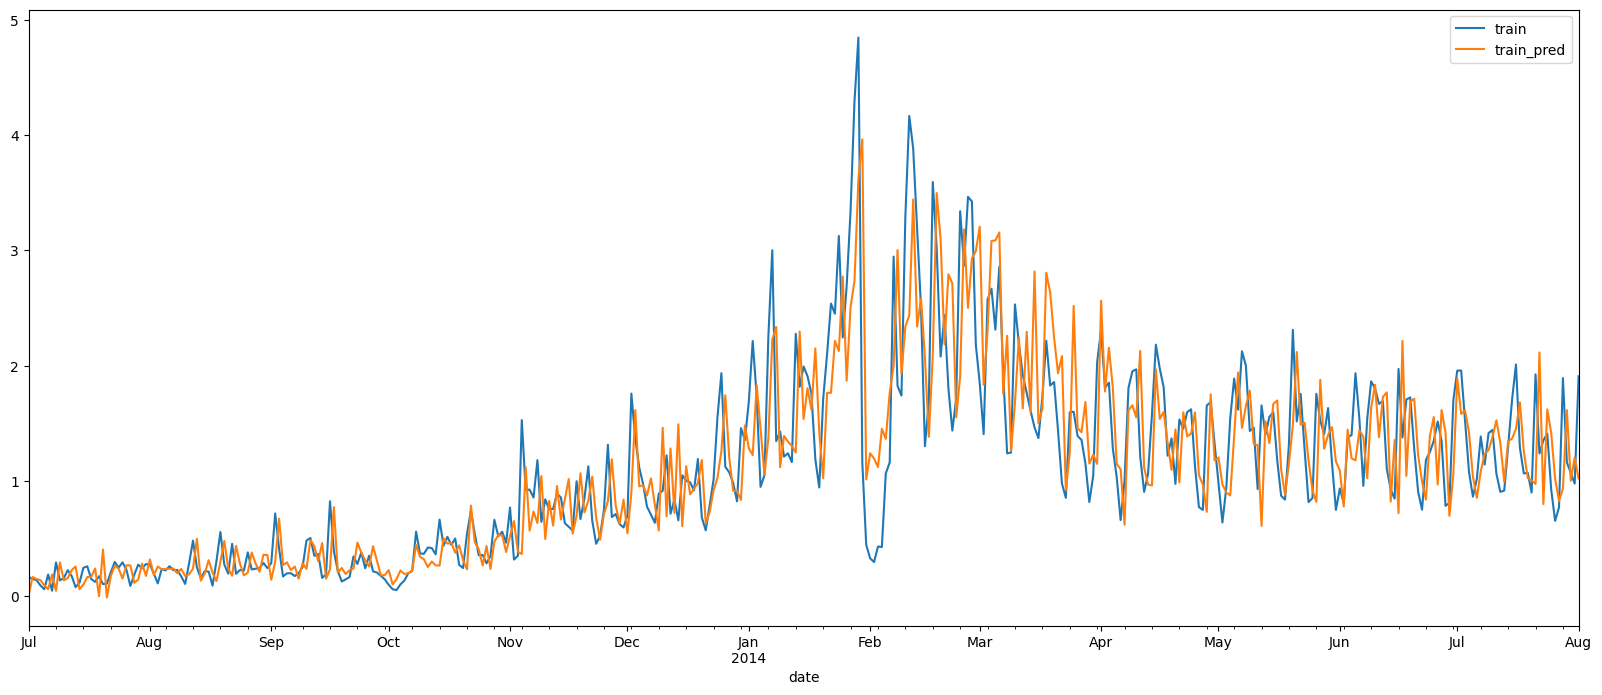

In [8]:

train_pred=model.fittedvalues()
pd.concat([train, train_pred], axis=1).plot(figsize=(20,8))
plt.legend(['train', 'train_pred'])


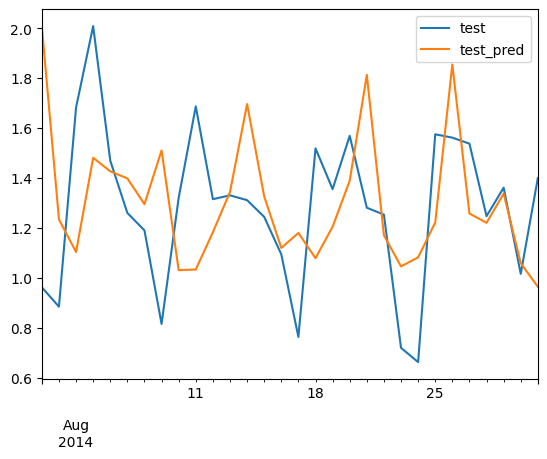

In [7]:
test_pred=model.predict(n_periods=len(test))
pd.concat([test, test_pred], axis=1).plot()

plt.legend(['test', 'test_pred'])